In [14]:
import tweepy
import pandas as pd
import credentials

In [15]:
auth = tweepy.OAuthHandler(credentials.CONSUMER_KEY,credentials.CONSUMER_SECRET)

In [16]:
auth.set_access_token(credentials.ACCESS_TOKEN,credentials.ACCESS_TOKEN_SECRET)

In [17]:
api = tweepy.API(auth)

In [18]:
tweet_data = api.search('bitcoin',count=50)

In [19]:
type(tweet_data)

tweepy.models.SearchResults

In [20]:
print(dir(tweet_data[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [21]:
for tweet in tweet_data:
    print(tweet.text)

RT @CEOAdam: TWITTER POLL #2: As you know, you can now purchase AMC gift cards using cryptocurrency, and our IT group is writing code so th…
RT @BitcoinFear: Bitcoin Fear and Greed Index is 54 - Neutral
Current price: $47,752 https://t.co/lJ0bHzqeCY
MicroStrategy Added Nearly 9,000 $BTC to Its Holdings During Q3

https://t.co/coe41Rhpfa
from Cryptopotato… https://t.co/Jex5wpJ4yx
@nypost For all those who are new to this working from home Bitcoin trading options 

Here's a little tip:

Get a t… https://t.co/rcJwJOH4z2
Top 10 Coins by Social Volume over the last 24 hrs on #LunarCrush!

$btc #bitcoin
$shib #shibainu
$eth #ethereum
$s… https://t.co/RZz1q9fMmc
@Hotbit_news Simargl TO THE SUN 🚀😍🤑🚀

#SIMA
#simaarmy
#Simargl
🚀🚀🚀🚀🚀🚀
#SimarglToken
#buy_sima
#Crypto
#Bitcoin #bnb… https://t.co/OPUpev8HaS
RT @ShiborgToken: SHIBORARMY!!! 😎🚀🦾
TODAY WE WRITE HISTORY! 
PRESALE AND THEN LAUNCH ON #PancakeSwap 

16:00 UTC 

#SHIBORGINU #SHIBORGARMY…
RT @CashApp: 👻 We’re giving away $20,000 today in bitc

In [22]:
!pip install textblob

In [23]:
from textblob import TextBlob

In [24]:
for tweet in tweet_data:
    blob = TextBlob(tweet.text)
    print(blob.sentiment)
    print(blob.sentiment.polarity)
    print(blob.string)
    print('----------------')
    

Sentiment(polarity=0.0, subjectivity=0.0)
0.0
RT @CEOAdam: TWITTER POLL #2: As you know, you can now purchase AMC gift cards using cryptocurrency, and our IT group is writing code so th…
----------------
Sentiment(polarity=0.0, subjectivity=0.4)
0.0
RT @BitcoinFear: Bitcoin Fear and Greed Index is 54 - Neutral
Current price: $47,752 https://t.co/lJ0bHzqeCY
----------------
Sentiment(polarity=0.1, subjectivity=0.4)
0.1
MicroStrategy Added Nearly 9,000 $BTC to Its Holdings During Q3

https://t.co/coe41Rhpfa
from Cryptopotato… https://t.co/Jex5wpJ4yx
----------------
Sentiment(polarity=-0.025568181818181823, subjectivity=0.4772727272727273)
-0.025568181818181823
@nypost For all those who are new to this working from home Bitcoin trading options 

Here's a little tip:

Get a t… https://t.co/rcJwJOH4z2
----------------
Sentiment(polarity=0.17777777777777778, subjectivity=0.2111111111111111)
0.17777777777777778
Top 10 Coins by Social Volume over the last 24 hrs on #LunarCrush!

$btc #bitcoin

In [25]:
pos = 0
neg = 0
neu = 0

for tweet in tweet_data:
    blob = TextBlob(tweet.text)
    if blob.sentiment.polarity < 0:
        neg+=1
        
    elif blob.sentiment.polarity == 0:
        neu+=1
        
    else:
        pos+=1
        



In [26]:
#plot pie chart

In [27]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2229ece77f0>,
 [Text(0.4049370232742902, 1.0227541284110062, 'pos'),
  Text(-1.046162158377023, 0.3399187231970734, 'neg'),
  Text(0.06906950569907225, -1.0978294054098232, 'neu')],
 [Text(0.22087473996779464, 0.5578658882241851, '38.0%'),
  Text(-0.5706339045692852, 0.1854102126529491, '14.0%'),
  Text(0.037674275835857585, -0.5988160393144489, '48.0%')])

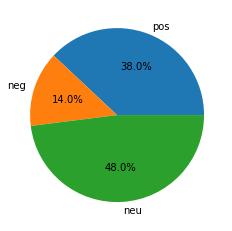

In [28]:
plt.pie([pos,neg,neu],labels=['pos','neg','neu'],autopct = '%1.1f%%')

In [29]:
#making df of user

In [30]:
user = []
text = []
retweets = []
favourites = []

for tweet in tweet_data:
    user.append(tweet.user.name)
    text.append(tweet.text)
    retweets.append(tweet.retweet_count)
    favourites.append(tweet.favorite_count)
    
    
    
    

In [31]:
btc_tweets_scrapped_df = pd.DataFrame({'user':user,'text':text,'retweets':retweets,'favourites':favourites})

In [32]:
btc_tweets_scrapped_df.head()

,user,text,retweets,favourites
0,Nimo Aksoy (tercüman) 🦅 🇹🇷🇧🇪🇹🇷 🦅,"RT @CEOAdam: TWITTER POLL #2: As you know, you...",6074,0
1,Teddy Crypto,RT @BitcoinFear: Bitcoin Fear and Greed Index ...,69,0
2,Stylycrypt,"MicroStrategy Added Nearly 9,000 $BTC to Its H...",0,0
3,Adrienne Hurts,@nypost For all those who are new to this work...,0,0
4,brizpaint.near,Top 10 Coins by Social Volume over the last 24...,0,0


In [33]:
btc_tweets_scrapped_df.sort_values('retweets',ascending=False,inplace=True)

In [34]:
btc_tweets_scrapped_df.head()

,user,text,retweets,favourites
10,Lolicism,"RT @CashApp: 👻 We’re giving away $20,000 today...",8375,0
7,EMB,"RT @CashApp: 👻 We’re giving away $20,000 today...",8375,0
17,babyboo_92🌹🥀,"RT @CashApp: 👻 We’re giving away $20,000 today...",8375,0
16,aiyanna♡,"RT @CashApp: 👻 We’re giving away $20,000 today...",8375,0
38,Jason N,"RT @CashApp: 👻 We’re giving away $20,000 today...",8375,0


In [36]:
print('Top 5 tweets on bitcoin out of 50 latest tweets are displayed below:\n\n' )
for tweet in btc_tweets_scrapped_df.text.head():
    print(tweet)
    print('*'*100)

Top 5 tweets on bitcoin out of 50 latest tweets are displayed below:


RT @CashApp: 👻 We’re giving away $20,000 today in bitcoin and cash. Share this post with your $Cashtag for a chance to win $100, $250, or $…
****************************************************************************************************
RT @CashApp: 👻 We’re giving away $20,000 today in bitcoin and cash. Share this post with your $Cashtag for a chance to win $100, $250, or $…
****************************************************************************************************
RT @CashApp: 👻 We’re giving away $20,000 today in bitcoin and cash. Share this post with your $Cashtag for a chance to win $100, $250, or $…
****************************************************************************************************
RT @CashApp: 👻 We’re giving away $20,000 today in bitcoin and cash. Share this post with your $Cashtag for a chance to win $100, $250, or $…
**************************************************************